In [1]:
#----------------102种花花的分类任务-----------------------
#102个label：1-102， 每个类别27张图（jpg)
#json封装了label的具体类别

In [2]:
#torch包和环境的配置
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.optim as optim


In [3]:
#torchvision
import torchvision
from torchvision import transforms,models,datasets

In [4]:
#图像加载的包
import imageio
import time
import warnings
import random 
import sys
import copy
import json
from PIL import Image

In [5]:
#pip install torchvision

In [6]:
#数据路径
#data_dir='/Users/momozi1996/Downloads/第二天/卷积网络实战/flower_data/'
data_dir='/data/moyan/flower_data/'
train_dir=data_dir+'/train'
test_dir=data_dir+'/valid'

In [7]:
#第一步：数据源制作---数据增强
#【作用】：(高效利用数据，数据扩增，单纯的图像复制操作对图片每个点的像素值没有改变)

#data_transforms包含所有图像预处理的操作，我们能够看到多种图像变换（旋转、裁剪，翻转），而Compose方法是将多种变换组合起来。

#Pytorch：transforms的22个方法，详细见：https://blog.csdn.net/weixin_38533896/article/details/86028509
# https://zhuanlan.zhihu.com/p/54527197

In [8]:

#使用Compose函数生成一个PiPeLine：封装图像变换的所有操作；我们就可以直接使用data_transform来进行图像的变换

data_transforms={
    'train': transforms.Compose([transforms.RandomRotation(45),#随机旋转角度，在（-45,45）之间选择一个角度进行旋转
        transforms.CenterCrop(224),                #从图像的中心裁剪一个224*224的图像
        transforms.RandomHorizontalFlip(p=0.5),    #随机水平翻转；p=1则肯定会水平翻转
        transforms.RandomVerticalFlip(p=0.5),      #随机垂直翻转
        transforms.ColorJitter(brightness=0.2,contrast=0.1,saturation=0.1,hue=0.1),  #参数1为亮度，参数2为对比度，参数3为饱和度，参数4为色相
        transforms.RandomGrayscale(p=0.025),       #概率转换成灰度率，3通道就是R=G=B;如果是灰度图可能不需要转？
        transforms.ToTensor(),       #必须必！！      将PIL Image或者 ndarray 转换为tensor，并且归一化至[0-1]                      
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])                             #数据按通道标准化：即先减均值矩阵，再除以标准差矩阵，注意是 chw
       ]),
    'valid':transforms.Compose([transforms.Resize(256),#resize to 256
        transforms.CenterCrop(224),                #保持 
        transforms.ToTensor(),                      #保持                      
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])     #保持                  
       ]),
}

#数据预处理 get！！

In [9]:
#第二步：依次加载数据，并查看情况
#① 创建一个 Dataset 对象
#② 创建一个 DataLoader 对象
#③ 循环这个 DataLoader 对象，将img, label加载到模型中进行训练

In [10]:
batch_size=8 #每次进入训练的样本为8个

In [11]:
image_datasets= {x:datasets.ImageFolder(os.path.join(data_dir,x),transform=data_transforms[x]) for x in ['train','valid']}  #定义了数据路径
dataloaders={x:torch.utils.data.DataLoader(image_datasets[x],batch_size=batch_size,shuffle=True) for x in['train','valid']}
dataset_sizes={x:len(image_datasets[x]) for x in ['train','valid']}
class_names=image_datasets['train'].classes

#ImageFolder假设所有的文件按文件夹保存好，每个文件夹下面存贮同一类别的图片，文件夹的名字为分类的名字；
#ImageFolder通用的数据加载器，它要求我们png格式来组织数据集的训练、验证或者测试图片。


In [12]:
image_datasets  #查看数据加载

{'train': Dataset ImageFolder
     Number of datapoints: 6552
     Root location: /data/moyan/flower_data/train
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=(-45, 45), resample=False, expand=False)
                CenterCrop(size=(224, 224))
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ColorJitter(brightness=[0.8, 1.2], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
                RandomGrayscale(p=0.025)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'valid': Dataset ImageFolder
     Number of datapoints: 818
     Root location: /data/moyan/flower_data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=PIL.Image.BILINEAR)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229,

In [13]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f3f20b3aca0>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f3eaa446f70>}

In [14]:
dataset_sizes

{'train': 6552, 'valid': 818}

In [15]:
class_names

['1',
 '10',
 '100',
 '101',
 '102',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

In [16]:
#第三步：加载类别的标签，存放在json中

In [17]:
#打开json并查看
with open('cat_to_name.json','r') as f:
    cat_to_name=json.load(f)

In [18]:
cat_to_name

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 

In [19]:
###展示数据
#tensor的数据需要转换成numpy的格式，而且还需要还原回标准化的结果

In [20]:
def im_convert(tensor):
    """展示数据"""
    
    image=tensor.to("cpu").clone().detach()#调用CPU
    image=image.numpy().squeeze()
    image=image.transpose(1,2,0)  #plt.imshow在现实的时候输入的是（imagesize,imagesize,channels）但是数据保存时（channels，imagesize,imagesize）
    image=image*np.array((0.229, 0.224, 0.225))+np.array((0.485, 0.456, 0.406)) #前面做了normalize [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
    image=image.clip(0, 1)#裁剪
    return image


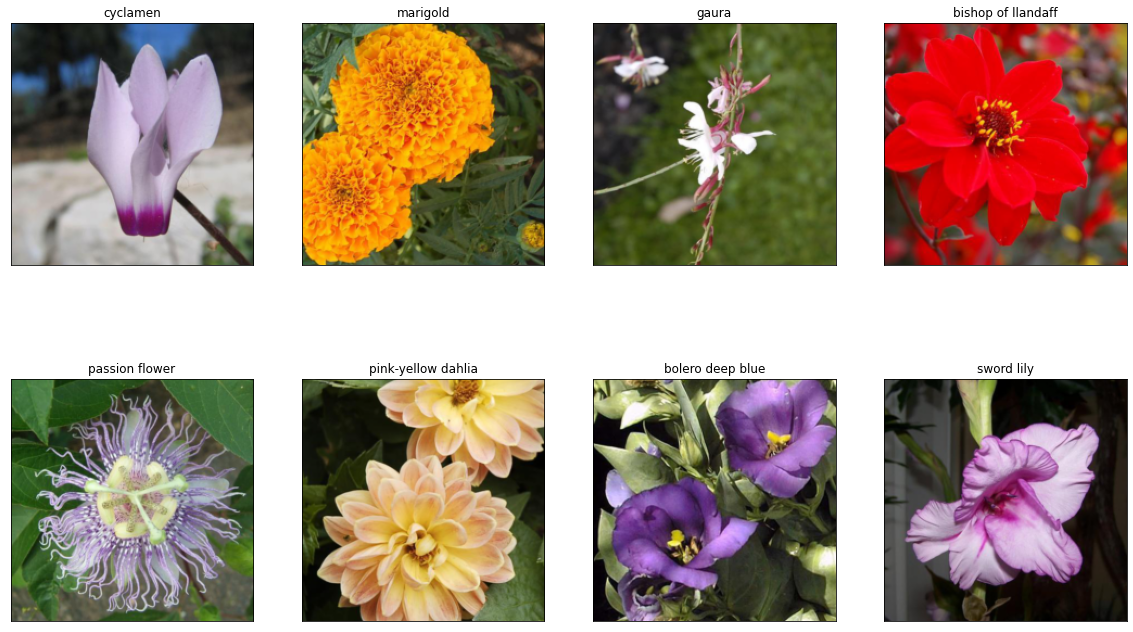

In [21]:
fig=plt.figure(figsize=(20,12))
cloumns=4
rows=2

dataiter=iter(dataloaders['valid'])
inputs,classes =dataiter.next()

#依次写入图片
for idx in range (cloumns*rows):
    ax=fig.add_subplot(rows,cloumns,idx+1,xticks=[],yticks=[])
    ax.set_title(cat_to_name[str(int(class_names[classes[idx]]))])
    plt.imshow(im_convert(inputs[idx]))  #单张传入
plt.show()  #窗口展示



In [22]:
#第四步：配置model的初始参数

In [23]:
model_name='resnet'#可选的比较多 ['resnet', 'alexnet', 'vgg', 'squeezenet', 'densenet', 'inception']

feature_extract=True #特征提取

In [24]:
#是否使用GPU训练
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')
    
device = torch.device("cuda:7" if torch.cuda.is_available() else "cpu")  #cuda:7 修改为服务器空置的显卡

CUDA is available!  Training on GPU ...


In [25]:
#model传入，进行特征提取
def set_parameter_requires_grad(model,feature_extracting):
    if feature_extracting:
        for param in model.parameters():  #获取网络参数
            param.requires_grad=False

In [26]:
model_ft=models.resnet152()  #Res18，Res34，Res50，Res101，Res152。

In [27]:
model_ft  #查看需要调用的model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [28]:
#配置model类别，配置输出层FC，特征提取，配置预训练初始参数

In [29]:
def initialize_model(model_name,num_classes,feature_extract,use_pretrained=True):
    model_ft=None  #初始化传出模型
    input_size=0   #初始化传出size
     
    #条件判断
    if model_name=="resnet":
        """Resnet152
        """
        model_ft= models.resnet152(pretrained=use_pretrained)  #使用resnet152，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)   #获取网络参数 
        #提取fc层中固定的参数
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Sequential(nn.Linear(num_ftrs, num_classes),   #全连接层修改类别为102
                                    nn.LogSoftmax(dim=1))           #激活函数对softmax的结果进行log，即Log(Softmax(x)) 
        #dim=0：对每一列的所有元素进行softmax运算，并使得每一列所有元素和为1。
        #dim=1：对每一行的所有元素进行softmax运算，并使得每一行所有元素和为1。               
        
        input_size=224
        
    elif model_name=="alexnet":
        """Alexnet
        """
        model_ft= models.alexnet(pretrained=use_pretrained)  #使用Alexnet152，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)   
        num_ftrs = model_ft.classifier[6].in_features
        
        model_ft.classifier[6]= nn.Linear(num_ftrs, num_classes)    #线性输出，第六层分类器                    
        input_size=224
        
    elif model_name=="vgg":
        """VGG11_bn
        """
        model_ft= models.vgg16(pretrained=use_pretrained)  #使用VGG16，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)   
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6]= nn.Linear(num_ftrs, num_classes)    #线性输出，第六层分类器                    
        input_size=224 
        
        
    elif model_name=="squeezenet":
        """Squeezenet
        """
        model_ft= model.squeezenet1_0(pretrained=use_pretrained)  #使用squeezenet1_0，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)   
        model_ft.classifier[1]= nn.Conv2d(512, num_classes,kernel_size=(1,1),stride=(1,1))    #卷积层输出，第1层分类器                    
         #参数说明：https://blog.csdn.net/qq_26369907/article/details/88366147
        model_ft.num_classes=num_classes
        input_size=224        

    elif model_name=="densenet":
        """Densenet
        """
        model_ft= models.densenet121(pretrained=use_pretrained)  #使用densenet121，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)   
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier= nn.Linear(num_ftrs, num_classes)    #线性输出
        input_size=224  
        
        
    elif model_name=="inception":
        """Inception V3
           注意：图像输入大小为229*229
        """
        model_ft= models.inception_v3(pretrained=use_pretrained)  #使用densenet121，使用预训练参数
        set_parameter_requires_grad(model_ft,feature_extract)
        #处理辅助网AuxLogits
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc= nn.Linear(num_ftrs, num_classes)
        #处理初级网
        num_ftrs = model_ft.fc.in_features
        model_ft.fc= nn.Linear(num_ftrs, num_classes)
        input_size=229
        
        
    else:
        print("Invalid name,exiting...")
        exit()
        
        
    return model_ft,input_size
   

In [30]:
#models = t.nn.Sequential(
#    t.nn.Linear(input_data, hidden_layer),
#    t.nn.ReLU(),
 #   t.nn.Linear(hidden_layer, output_data)
#    )

#--torch.nn.Sequential 括号内的内容就是我们搭建的神经网络模型的具体结： *

#----torch.nn.Linear(input_data,hidden_layer) 完成从输入层到隐藏层的线性变换；
#----torch.nn.ReLU() 为激活函数； 还有： PReLU 、LeakyReLU 、Tanh 、Sigmoid 、Softmax 等。
#----torch.nn.Linear(hidden_layer, output_data) 完成从隐藏层到输出层的线性变换；


#https://blog.csdn.net/wohu1104/article/details/107646744

In [31]:
#定义需要训练的层数

In [32]:
model_ft,input_size=initialize_model(model_name,102,feature_extract,use_pretrained=True)

In [33]:
#model_ft.parameters()

In [34]:
#调用GPU计算
model_ft=model_ft.to(device)

#model保存
filename='checkpoint.pth'

#查看优化器可优化的参数
params_to_update=model_ft.parameters()


print("Parameter to learn:")

if feature_extract: #有特征提取
    params_to_update=[]
    for name,param in model_ft.named_parameters():  #获得参数
        if param.requires_grad==True:
            params_to_update.append(param)  #参数赋值
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad==True:    #无参数赋值
            print("\t",name)

Parameter to learn:
	 fc.0.weight
	 fc.0.bias


In [35]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [36]:
##5,优化器设置

In [37]:
#优化器
optimizer_ft=optim.Adam(params_to_update,lr=0.01)  #Adam: A Method for Stochastic Optimization,一种随机优化方法;
#lr:learning rate 0.01

#调度器
scheduler=optim.lr_scheduler.StepLR(optimizer_ft,step_size=7,gamma=0.1)  #学习率每7个epoch衰减成原来的1/10
#PyTorch学习率调整策略通过torch.optim.lr_scheduler接口,等间隔调整(Step)


#损失函数（负对数似然损失）nn.NLLLoss的结果就是把上面的输出与Label对应的那个值拿出来，再去掉负号，再求均值
criterion=nn.NLLLoss()

#最后一层已经LogSoftmax()了，所以不能nn.CrossEntropyLoss()来计算了，nn.CrossEntropyLoss()相当于logSoftmax()和nn.NLLLoss()整合

In [38]:
#优化器Adam用法：https://blog.csdn.net/Ibelievesunshine/article/details/99624645

#torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)[source]
#--params (iterable) – 待优化参数的iterable或者是定义了参数组的dict
#--lr (float, 可选) – 学习率（默认：1e-3）
#--betas (Tuple[float, float], 可选) – 用于计算梯度以及梯度平方的运行平均值的系数（默认：0.9，0.999）
#--eps (float, 可选) – 为了增加数值计算的稳定性而加到分母里的项（默认：1e-8）
#--weight_decay (float, 可选) – 权重衰减（L2惩罚）（默认: 0）


#调度器，等距离StepLR()：
#class torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)

#等间隔调整学习率，调整倍数为gamma倍，调整间隔为step_size。间隔单位是step。需要注意的是，step通常是指epoch，不要弄成iteration了


In [39]:
##6，训练模块 train_model() 一次传入模型，数据，损失函数，优化器，epoch数量

In [40]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False,filename=filename):
    since = time.time()
    best_acc = 0
    """
    checkpoint = torch.load(filename)
    best_acc = checkpoint['best_acc']
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    model.class_to_idx = checkpoint['mapping']
    """
    model.to(device)

    val_acc_history = []
    train_acc_history = []
    train_losses = []
    valid_losses = []
    LRs = [optimizer.param_groups[0]['lr']]

    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # 训练和验证
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # 训练
            else:
                model.eval()   # 验证

            running_loss = 0.0
            running_corrects = 0

            # 把数据都取个遍
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 清零
                optimizer.zero_grad()
                # 只有训练的时候计算和更新梯度
                with torch.set_grad_enabled(phase == 'train'):
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:#resnet执行的是这里
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # 训练阶段更新权重
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 计算损失
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            
            
            time_elapsed = time.time() - since
            print('Time elapsed {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            

            # 得到最好那次的模型
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                state = {
                  'state_dict': model.state_dict(),
                  'best_acc': best_acc,
                  'optimizer' : optimizer.state_dict(),
                }
                torch.save(state, filename)
            if phase == 'valid':
                val_acc_history.append(epoch_acc)
                valid_losses.append(epoch_loss)
                scheduler.step(epoch_loss)
            if phase == 'train':
                train_acc_history.append(epoch_acc)
                train_losses.append(epoch_loss)
        
        print('Optimizer learning rate : {:.7f}'.format(optimizer.param_groups[0]['lr']))
        LRs.append(optimizer.param_groups[0]['lr'])
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # 训练完后用最好的一次当做模型最终的结果
    model.load_state_dict(best_model_wts)
    return model, val_acc_history, train_acc_history, valid_losses, train_losses, LRs 

In [41]:
#开始训练

In [42]:
model_ft,val_acc_history,train_acc_history,valid_losses,train_losses,LRs=train_model(model_ft,dataloaders,criterion,optimizer_ft,num_epochs=20,is_inception=(model_name=="inception"))

Epoch 0/19
----------
Time elapsed 1m 43s
train Loss: 9.9707 Acc: 0.3126
Time elapsed 1m 52s
valid Loss: 8.6891 Acc: 0.4071
Optimizer learning rate : 0.0010000

Epoch 1/19
----------
Time elapsed 3m 29s
train Loss: 2.1716 Acc: 0.7073
Time elapsed 3m 38s
valid Loss: 3.5105 Acc: 0.6345
Optimizer learning rate : 0.0100000

Epoch 2/19
----------
Time elapsed 5m 16s
train Loss: 9.4489 Acc: 0.4815
Time elapsed 5m 26s
valid Loss: 10.3473 Acc: 0.5355
Optimizer learning rate : 0.0010000

Epoch 3/19
----------
Time elapsed 7m 3s
train Loss: 2.8135 Acc: 0.7376
Time elapsed 7m 12s
valid Loss: 4.3139 Acc: 0.6736
Optimizer learning rate : 0.0100000

Epoch 4/19
----------
Time elapsed 8m 51s
train Loss: 9.3954 Acc: 0.5432
Time elapsed 8m 60s
valid Loss: 11.8599 Acc: 0.5098
Optimizer learning rate : 0.0010000

Epoch 5/19
----------
Time elapsed 10m 38s
train Loss: 2.8862 Acc: 0.7637
Time elapsed 10m 47s
valid Loss: 5.8487 Acc: 0.6699
Optimizer learning rate : 0.0100000

Epoch 6/19
----------
Time elap

In [43]:
##7,再训练所有层,10个epoch,并保存模型checkpoint

In [44]:
for param in model_ft.parameters():
    param.requires_grad=True

    
#再次训练所有参数，调低学习率

optimizer_ft=optim.Adam(params_to_update,lr=0.0001)  
scheduler=optim.lr_scheduler.StepLR(optimizer_ft,step_size=7,gamma=0.1)  
criterion=nn.NLLLoss()


In [45]:
#加载checkpoint 模型保存的参数

checkpoint=torch.load(filename)
best_acc=checkpoint['best_acc']
model_ft.load_state_dict(checkpoint['state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer'])
optimizer_ft.load_state_dict(checkpoint['optimizer'])

In [46]:
model_ft,val_acc_history,train_acc_history,valid_losses,train_losses,LRs=train_model(model_ft,dataloaders,criterion,optimizer_ft,num_epochs=10,is_inception=(model_name=="inception"))

Epoch 0/9
----------
Time elapsed 2m 22s
train Loss: 2.7732 Acc: 0.8112
Time elapsed 2m 30s
valid Loss: 6.2424 Acc: 0.7286
Optimizer learning rate : 0.0001000

Epoch 1/9
----------
Time elapsed 4m 51s
train Loss: 2.3860 Acc: 0.8301
Time elapsed 5m 0s
valid Loss: 5.4849 Acc: 0.7518
Optimizer learning rate : 0.0001000

Epoch 2/9
----------
Time elapsed 7m 21s
train Loss: 2.2202 Acc: 0.8320
Time elapsed 7m 29s
valid Loss: 5.9622 Acc: 0.7274
Optimizer learning rate : 0.0001000

Epoch 3/9
----------
Time elapsed 9m 49s
train Loss: 2.2960 Acc: 0.8277
Time elapsed 9m 58s
valid Loss: 6.2874 Acc: 0.7176
Optimizer learning rate : 0.0001000

Epoch 4/9
----------
Time elapsed 12m 20s
train Loss: 2.4028 Acc: 0.8275
Time elapsed 12m 29s
valid Loss: 6.8216 Acc: 0.7103
Optimizer learning rate : 0.0001000

Epoch 5/9
----------
Time elapsed 14m 51s
train Loss: 2.4170 Acc: 0.8291
Time elapsed 14m 60s
valid Loss: 5.5963 Acc: 0.7433
Optimizer learning rate : 0.0001000

Epoch 6/9
----------
Time elapsed 17m

In [47]:
##8，加载训练好的模型并进行测试

In [48]:
model_ft,inputs=initialize_model(model_name,102,feature_extract,use_pretrained=True)

#调用GPU
model_ft=model_ft.to(device)

#重新写：checkpoint
filename='checkpoint.pth'  #最终的模型


In [49]:
#加载训练好的模型

checkpoint=torch.load(filename)
best_acc=checkpoint['best_acc']
model_ft.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [50]:
##-----------------测试模型-------------------
#---测试数据处理方法需要跟训练时一致才可以
#--crop操作的目的是保证输入的大小是一致的
#---标准化操作也是必须的，用跟训练数据相同的mean和std,但是需要注意一点训练数据是在0-1上进行标准化，所以测试数据也需要先归一化
#---最后一点，PyTorch中颜色通道是第一个维度，跟很多工具包都不一样，需要转换

In [51]:
def process_image(image_path):
    # 读取测试数据
    img = Image.open(image_path)
    # Resize,thumbnail方法只能进行缩小，所以进行了判断
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, 256))
    else:
        img.thumbnail((256, 10000))
    # Crop操作
    left_margin = (img.width-224)/2
    bottom_margin = (img.height-224)/2
    right_margin = left_margin + 224
    top_margin = bottom_margin + 224
    img = img.crop((left_margin, bottom_margin, right_margin,   
                      top_margin))
    # 相同的预处理方法
    img = np.array(img)/255
    mean = np.array([0.485, 0.456, 0.406]) #provided mean
    std = np.array([0.229, 0.224, 0.225]) #provided std
    img = (img - mean)/std
    
    # 注意颜色通道应该放在第一个位置
    img = img.transpose((2, 0, 1))
    
    return img

In [52]:
def imshow(image, ax=None, title=None):
    """展示数据"""
    if ax is None:
        fig, ax = plt.subplots()
    
    # 颜色通道还原
    image = np.array(image).transpose((1, 2, 0))
    
    # 预处理还原
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    ax.set_title(title)
    
    return ax


<AxesSubplot:>

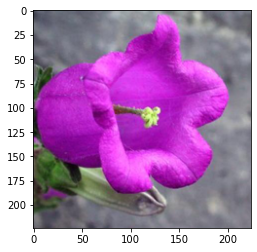

In [53]:
image_path='image_06621.jpg'
img=process_image(image_path)  #预处理
imshow(img)


In [54]:
img.shape

(3, 224, 224)

In [55]:
##获得一个batch的测试数据，用来展示真实label和预测结果

In [56]:
#获得一个batch的测试数据
dataiter = iter(dataloaders['valid'])  #从valid拿出一部分数据用于验证：dataiter
images, labels = dataiter.next()

model_ft.eval()  #模型验证

if train_on_gpu:
    output = model_ft(images.cuda(7))
else:
    output = model_ft(images)



In [57]:
output.shape

torch.Size([8, 102])

In [58]:
_, preds_tensor = torch.max(output, 1)

preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())
preds


array([85, 49, 82, 17, 76, 43, 43, 23])

In [59]:
#展示预测结果

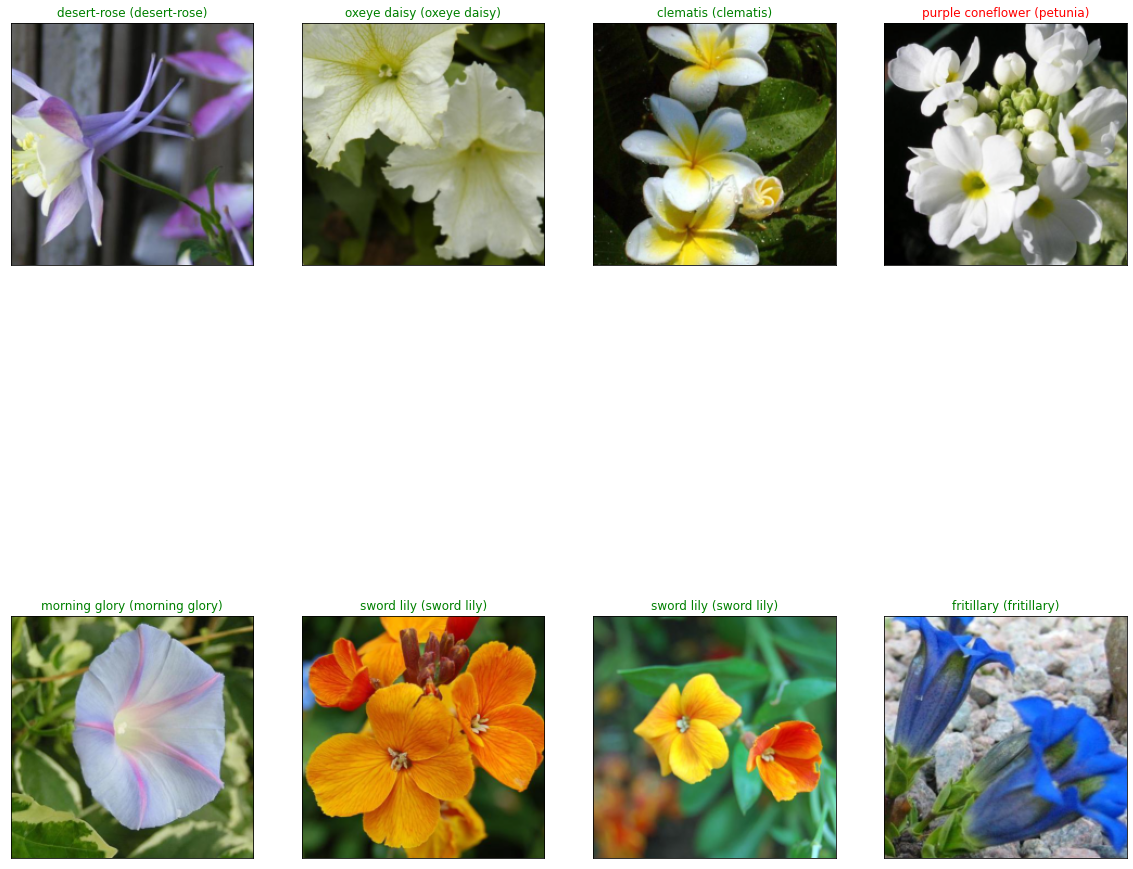

In [60]:
fig=plt.figure(figsize=(20, 20))
columns =4
rows = 2

for idx in range (columns*rows):
    ax = fig.add_subplot(rows, columns, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(cat_to_name[str(preds[idx])], cat_to_name[str(labels[idx].item())]),
                 color=("green" if cat_to_name[str(preds[idx])]==cat_to_name[str(labels[idx].item())] else "red"))
plt.show()